In [44]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

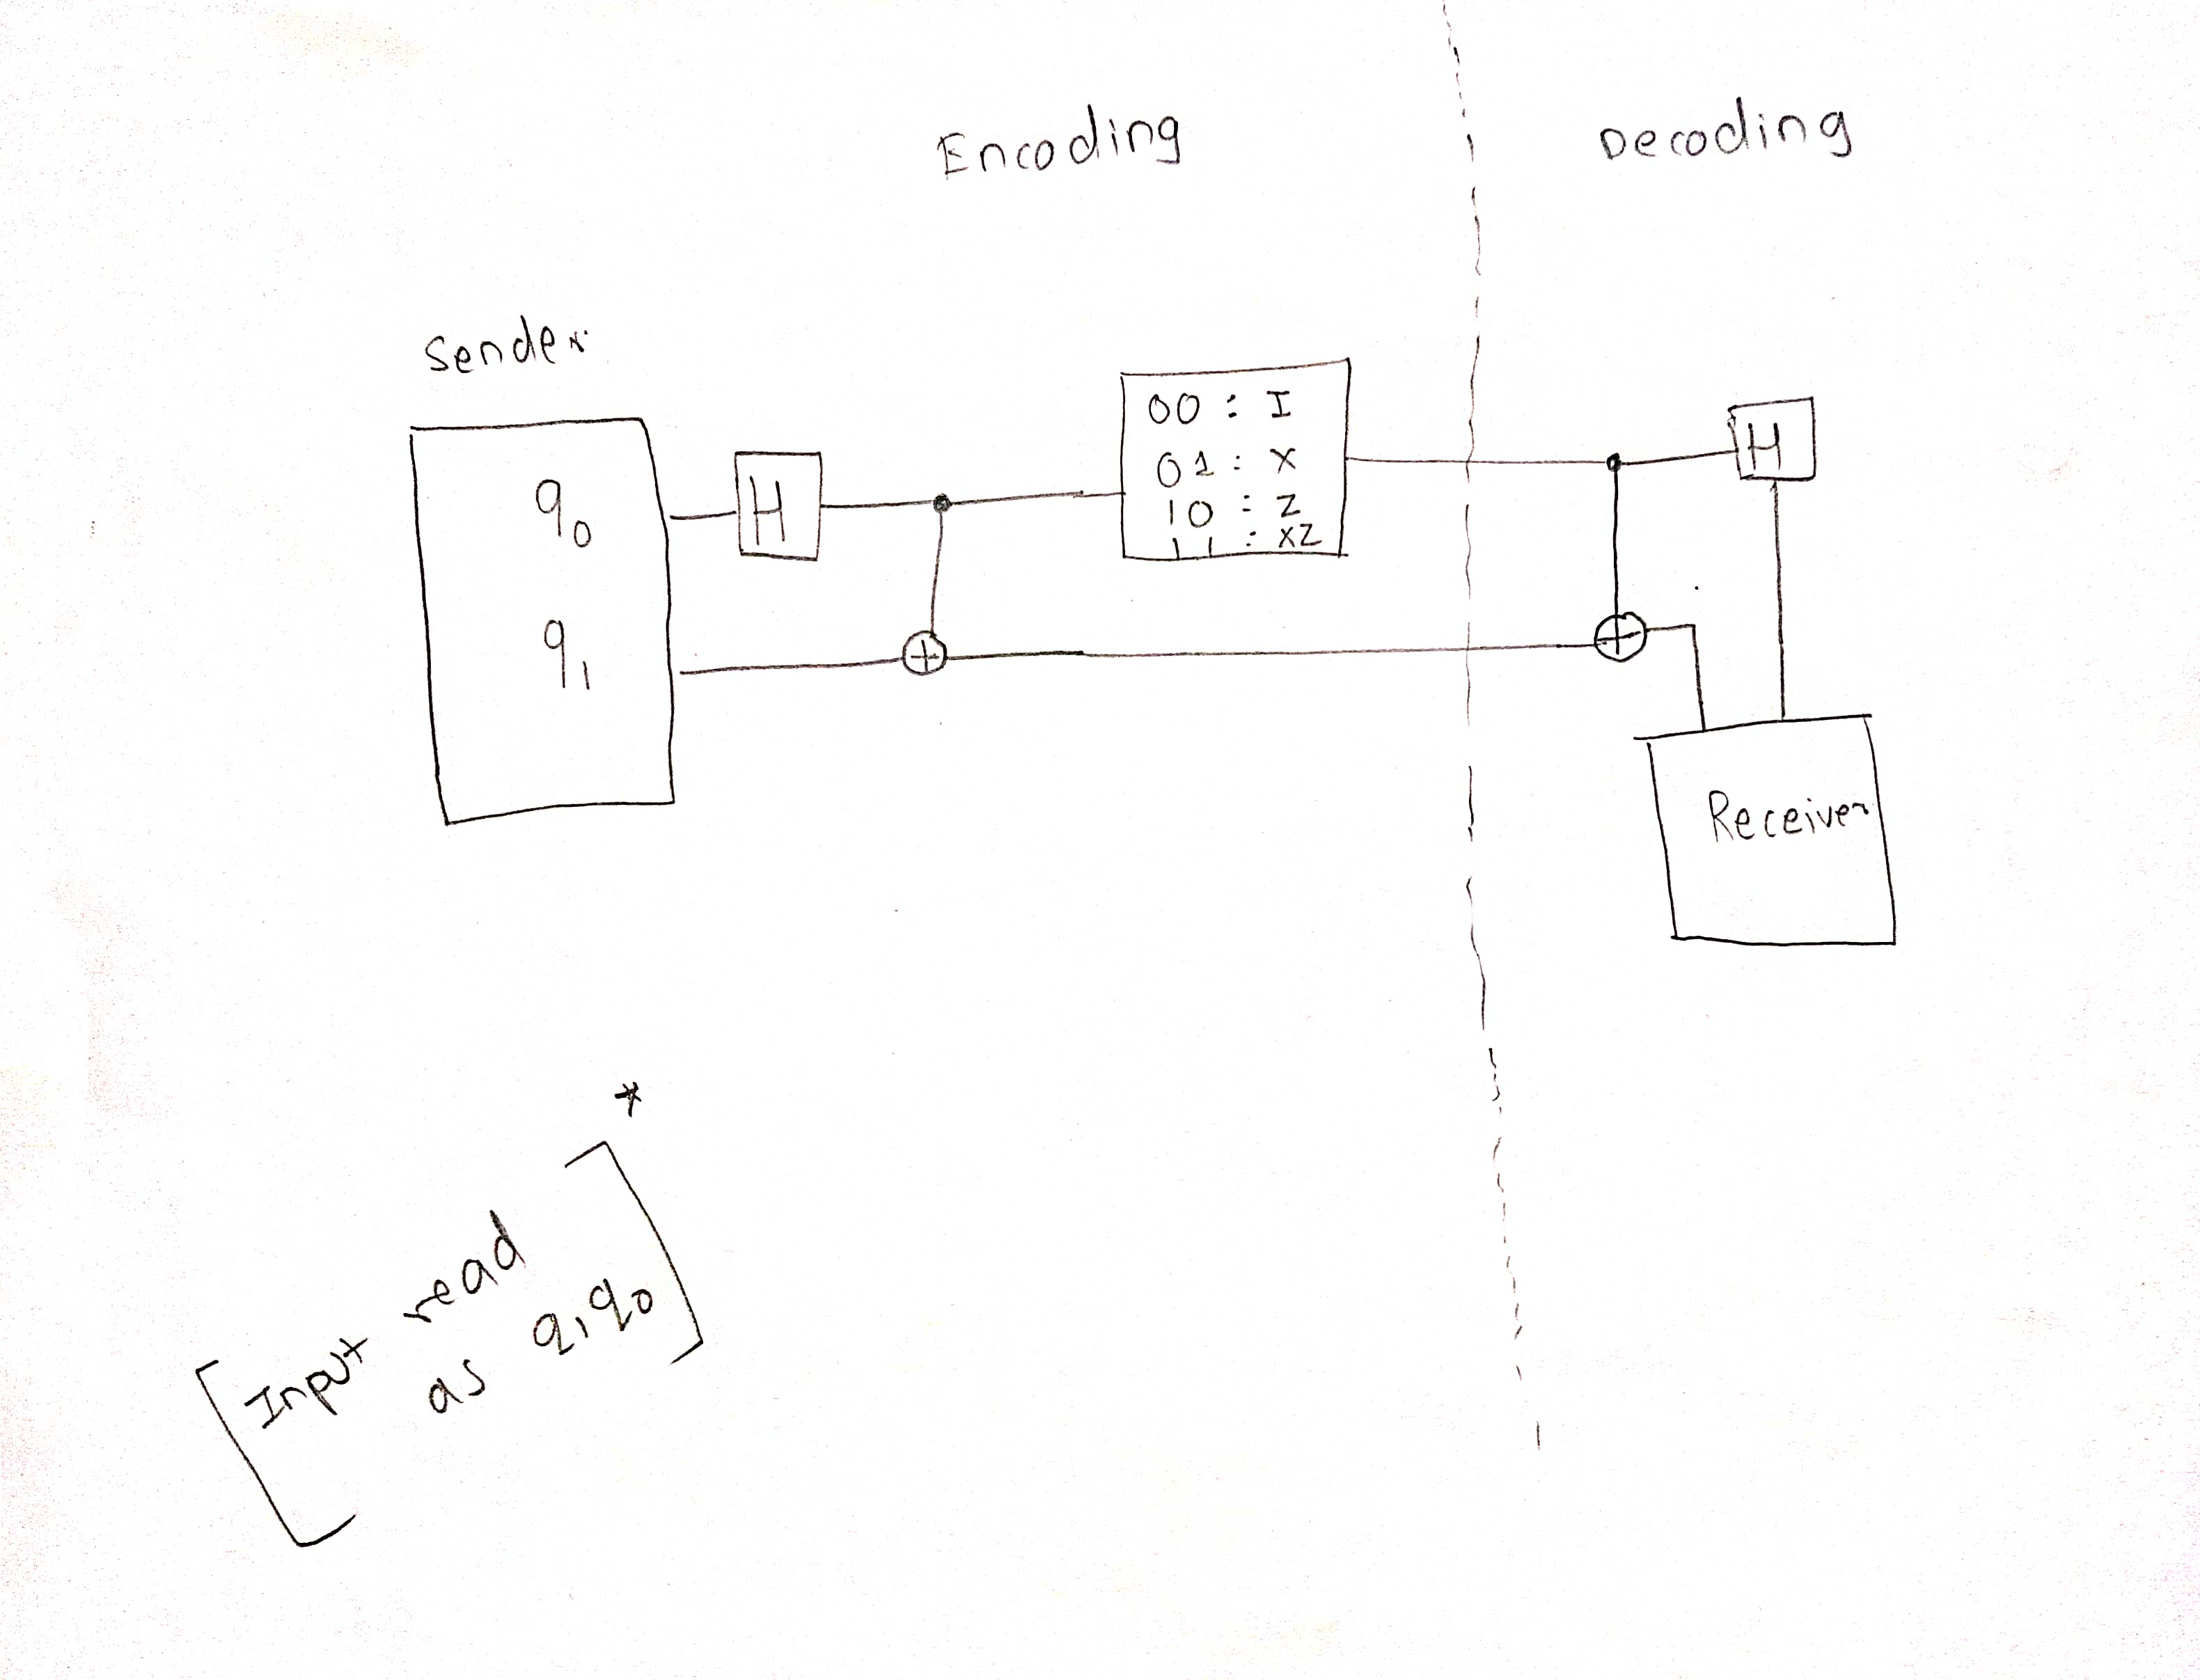

In [45]:
from IPython.display import Image
Image("image1.jpeg")

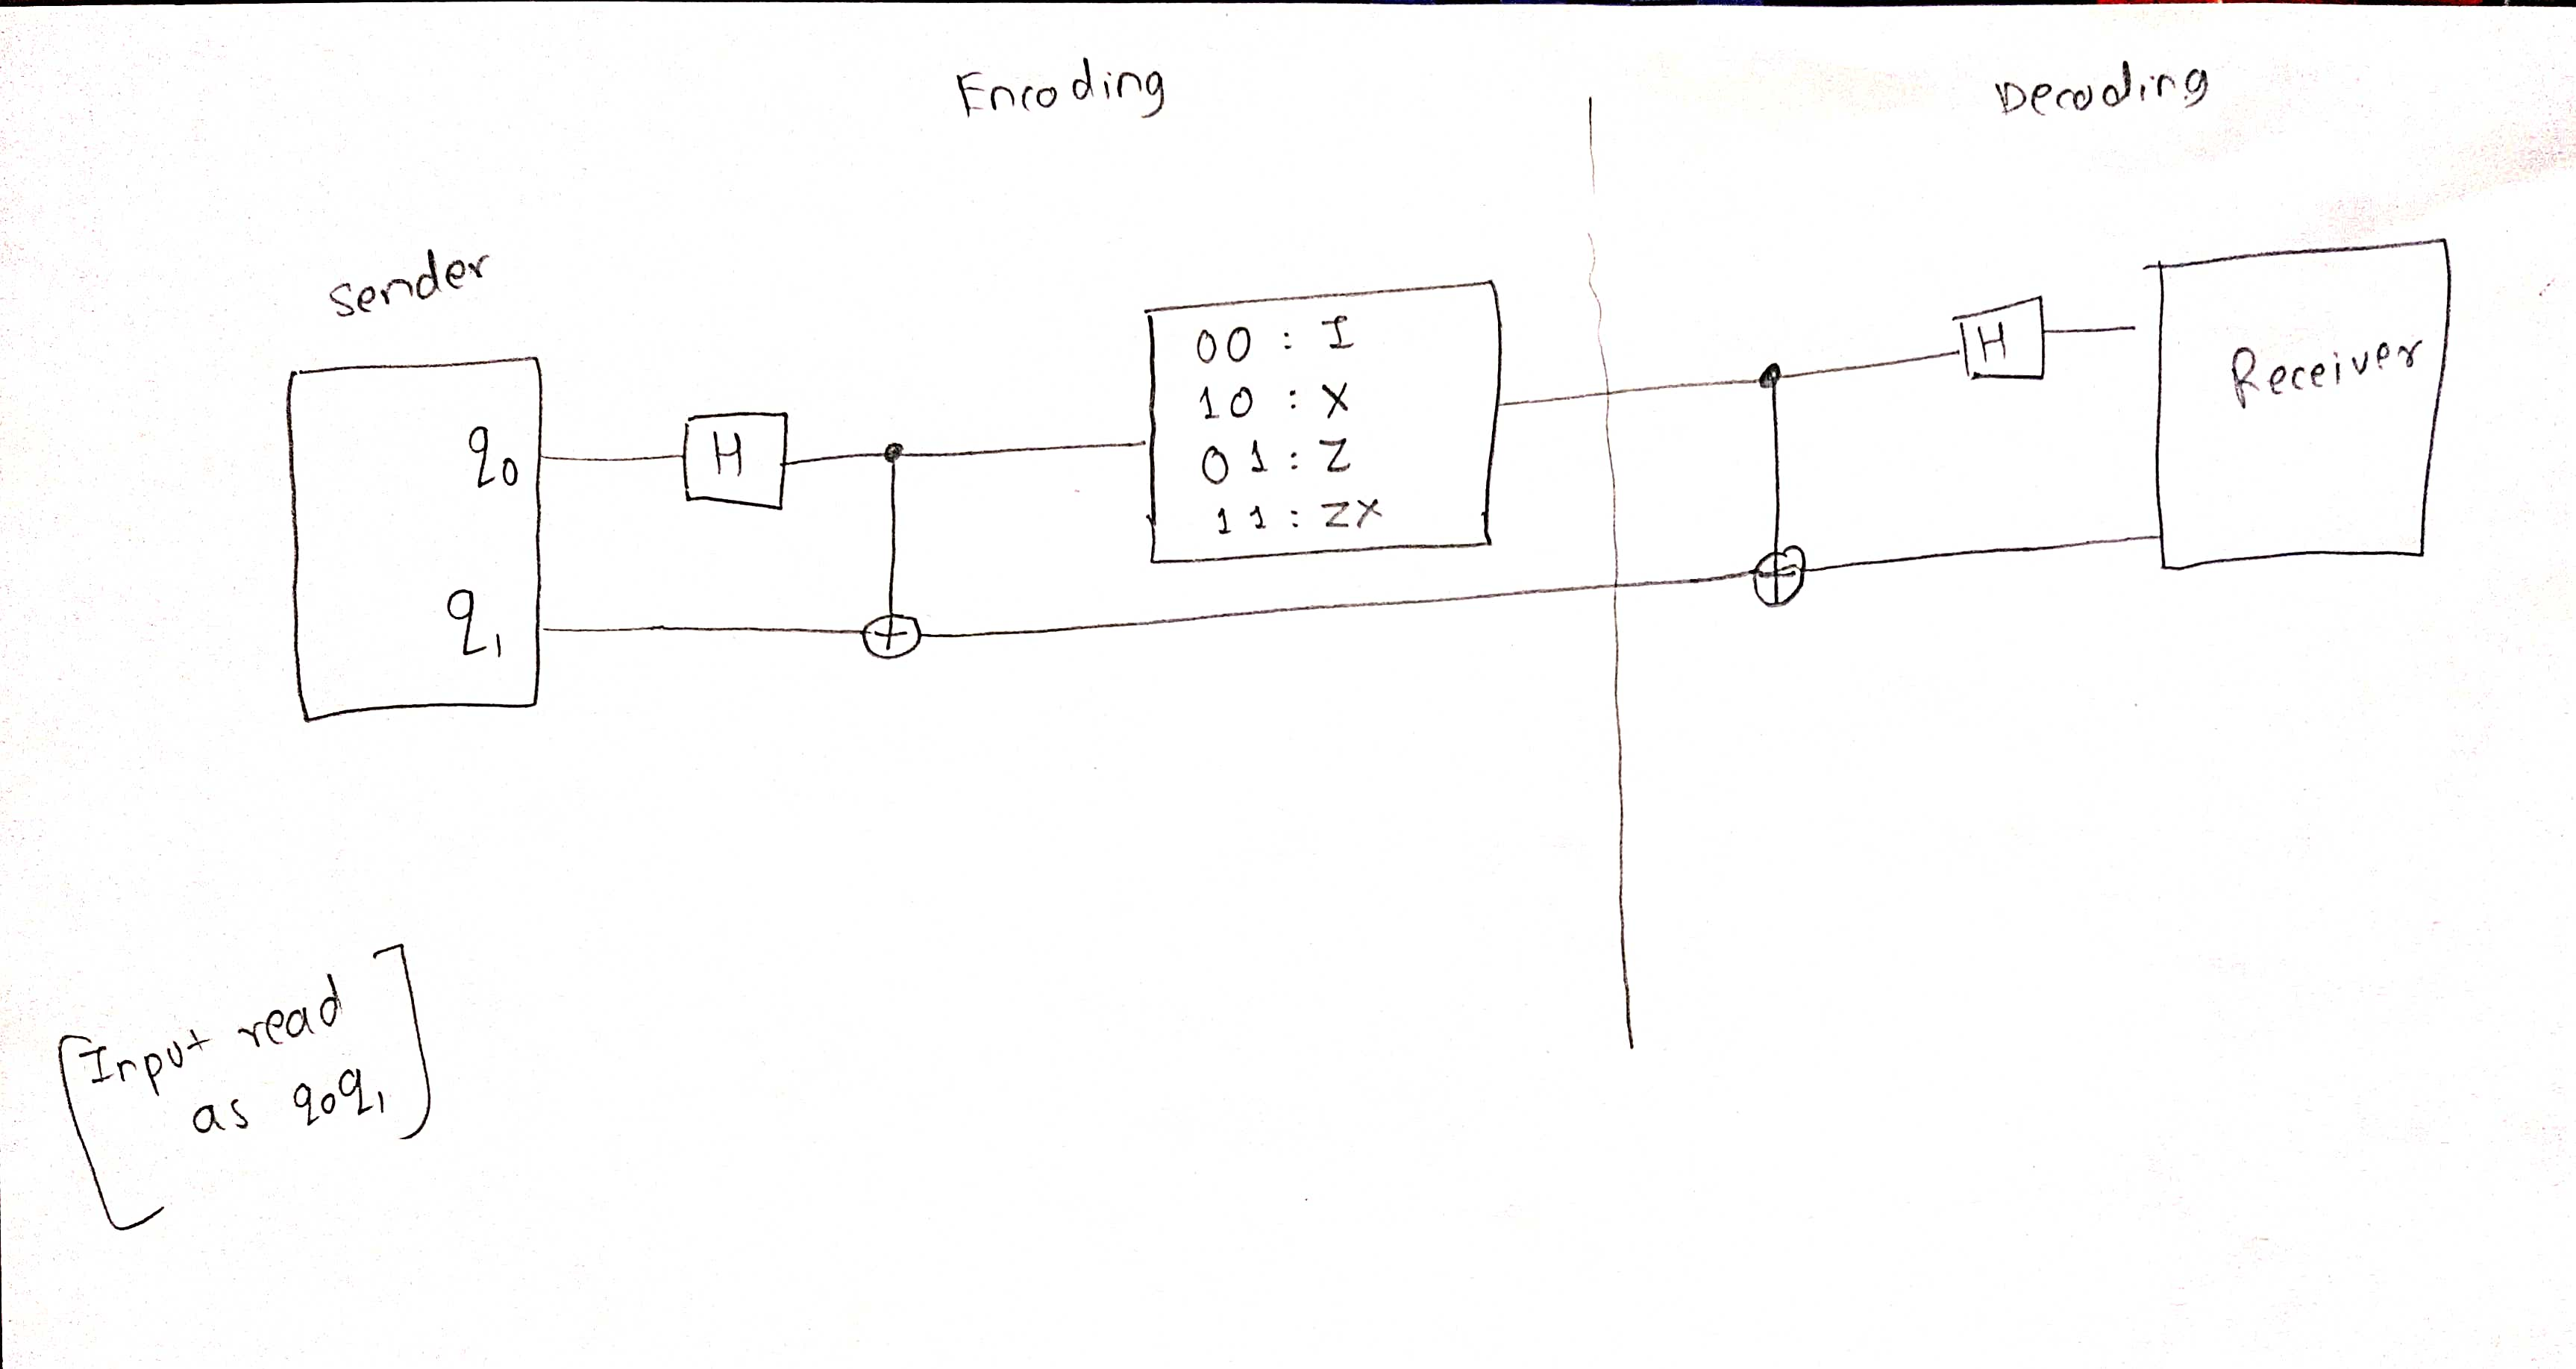

In [46]:
from IPython.display import Image
Image("image2.jpeg")

In [47]:
def create_bell_pair(qc, a, b):
    qc.h(a) 
    qc.cx(a,b) 

In [48]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass   
    elif msg == "10":
        qc.x(qubit) 
    elif msg == "01":
        qc.z(qubit) 
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
         
    else:
        print("Invalid Message: Sending '00'")

In [49]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

In [50]:
qc = QuantumCircuit(2)
create_bell_pair(qc, 0, 1)
qc.barrier()
message = "11"
encode_message(qc, 0, message)
qc.barrier()
decode_message(qc, 0, 1)
qc.measure_all()
qc.draw()

┌───┐      ░ ┌───┐┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ Z ├┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░────────────░─┤ X ├──────░──╫─┤M├
             └───┘ ░            ░ └───┘      ░  ║ └╥┘
meas: 2/════════════════════════════════════════╩══╩═
                                                0  1

{'11': 1024}


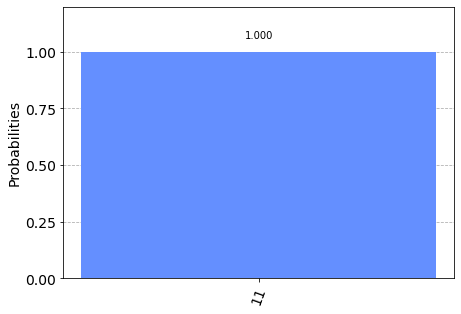

In [51]:
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)